### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`



### Section a)
To approximate π, we calculate the area of a quarter circle with radius $r=1$ within a unit square. The integral approximation for this approach is:
$$\pi \approx 4\times  \frac{N_{\text{Inside of circle}}}{N_{\text{Total}}}$$
To meet the 0.1% precision,  I adjust the number of samples, N, until the estimate of π converges to within 0.1% of its actual value (π ≈ 3.14159). The error can be calculated as:
$$ E = \left|\frac{\pi_{\text{estimate}}-\pi}{\pi}\right|\times 100 \%$$

Estimated π: 3.145± 0.096
Number of samples required for 0.1% precision: 16100


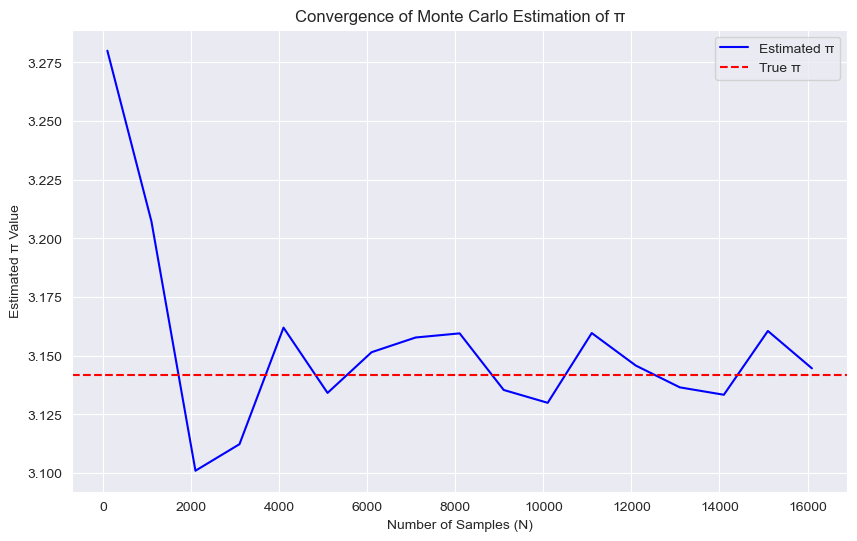

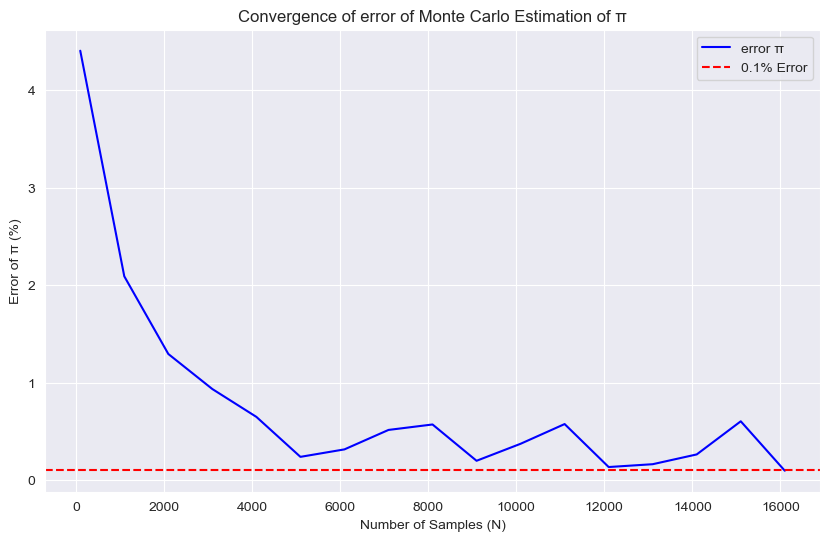

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters for π estimation
precision = 0.1            # Target precision for π estimation
actual_pi = np.pi          # True value of π for comparison
error = 100                # Initial error set to a high value to start the loop
N = 100                   # Initial sample size (number of points for early frames)



# Lists to store results for plotting
N_values = []  # Store the number of samples
pi_estimates = []  # Store the π estimates
error_list =[]
# Loop until the estimation error is within the target precision
while error > precision:
    inside_circle = 0  # Counter for points that fall inside the unit circle

    # Generate N random points within the square of side length 2 (from -1 to 1 in both x and y)
    for _ in range(N):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)  # Generate a random point
        # Check if the point lies inside the unit circle (distance from origin ≤ 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1  # Increment counter if point is within the circle

    # Estimate π based on the ratio of points inside the circle to total points
    pi_estimate = (inside_circle / N) * 4  # Scale by 4 for the area of the square

    # Calculate the relative error in percentage
    error= abs((pi_estimate - actual_pi) / actual_pi) * 100
    error_list.append(error)
    # Append current results for plotting
    N_values.append(N)
    pi_estimates.append(pi_estimate)

    # If error is still above target precision, increase N for more accurate estimation
    if error > precision:
        N += 1000  # Increase sample size in steps for efficiency

# Print final results after reaching the desired precision
print(f"Estimated π: {pi_estimate:.3f}± {error:.3f}")
print(f"Number of samples required for 0.1% precision: {N}")

# Plot the convergence of π estimate
plt.figure(figsize=(10, 6))
plt.plot(N_values, pi_estimates, label="Estimated π", color="blue")
plt.axhline(y=actual_pi, color="red", linestyle="--", label="True π")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Estimated π Value")
plt.title("Convergence of Monte Carlo Estimation of π")
plt.legend()

# Plotting the convergence
plt.figure(figsize=(10, 6))
plt.plot(N_values, error_list, label="error π", color="blue")
plt.axhline(y=0.1, color="red", linestyle="--", label="0.1% Error")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Error of π (%)")
plt.title("Convergence of error of Monte Carlo Estimation of π")
plt.legend()
plt.show()
plt.show()


The plot shows how the estimated value of π converges as the number of samples increases. The true value of π is marked by a horizontal red dashed line, while the estimated values are plotted as a line that stabilizes near π as N grows, reaching the desired precision.

### Section b)
In this method, points are uniformly sampled within a square that bounds the circle. We calculate the ratio of points that fall within the quarter circle to the total number of points.

Estimated π: 3.142111801242236 ± 0.042
95% Confidence Interval for π: (3.1005679638301875, 3.1836556386542845)
Number of samples required for 0.1% precision: 6000


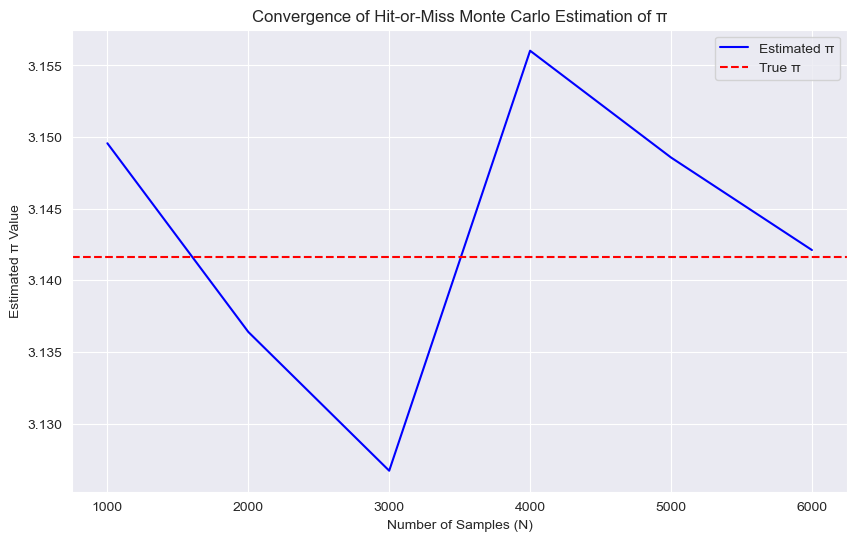

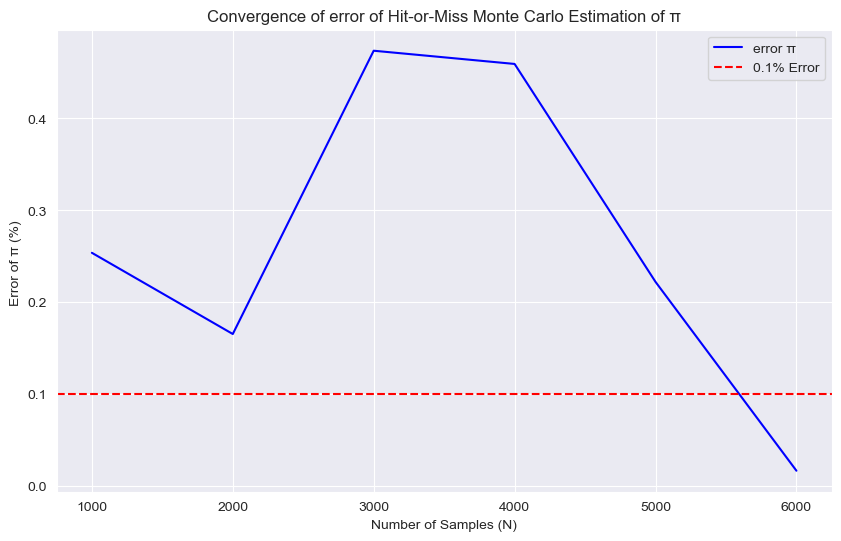

In [73]:
import numpy as np
import matplotlib.pyplot as plt
N_hits =1000# Initial sample size (number of points for early frames)
N_values_hits = []  # Number of samples
pi_estimates_hits = []  # Estimates of π
error_list_hits = []
error_hits =100 # Initial error set to a high value to start the loop
while error_hits > precision:
    hits = 0  # Count of points that fall inside the circle

    # Generate N random points within the square from (-1, -1) to (1, 1)
    for _ in range(N):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        # Check if the point is inside the unit circle
        if x**2 + y**2 <= 1:
            hits += 1  # Increment count if the point is inside the circle

    # Estimate π based on the hit-or-miss method
    pi_estimate_hits = (hits / N) * 4  # Scale by 4 for the area of the square

    # Calculate the error percentage
    error_hits = abs((pi_estimate_hits - actual_pi) / actual_pi) * 100
    error_list_hits.append(error_hits)

    # Store values for plotting
    N_values_hits.append(N_hits)
    pi_estimates_hits.append(pi_estimate_hits)

    # If precision is not met, increase N
    if error_hits > precision:
        N_hits += 1000  # Increase samples by 1000 for each iteration

p = pi_estimate_hits / 4   # Probability of a point landing inside the circle

# Calculate standard deviation of the π estimate
sigma_p = np.sqrt(p * (1 - p) / N_hits)
sigma_pi = 4 * sigma_p

# 95% confidence interval
z_score = 1.96
confidence_interval = (pi_estimate_hits - z_score * sigma_pi, pi_estimate_hits + z_score * sigma_pi)


# Display the results
print(f"Estimated π: {pi_estimate_hits} ± {z_score * sigma_pi:.3f}")
print(f"95% Confidence Interval for π: {confidence_interval}")
# Print the results after achieving 0.1% precision

print(f"Number of samples required for 0.1% precision: {N_hits}")

# Plotting the convergence
plt.figure(figsize=(10, 6))
plt.plot(N_values_hits, pi_estimates_hits, label="Estimated π", color="blue")
plt.axhline(y=actual_pi, color="red", linestyle="--", label="True π")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Estimated π Value")
plt.title("Convergence of Hit-or-Miss Monte Carlo Estimation of π")
plt.legend()

#plot errors vs N
plt.figure(figsize=(10, 6))
plt.plot(N_values_hits, error_list_hits, label="error π", color="blue")
plt.axhline(y= 0.1, color="red", linestyle="--", label="0.1% Error")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Error of π (%) ")
plt.title("Convergence of error of Hit-or-Miss Monte Carlo Estimation of π")
plt.legend()
plt.show()





- Monte Carlo methods rely on a large number of 16000 random samples to approximate results accurately. In the hit-or-miss method, estimating π with high precision typically requires many more samples than 6000.
- With only 6000 samples, there’s a significant likelihood that this precision might not hold consistently if I rerun the simulation.
- It seems the Monte- Calro method is more stabel.




### Plotting the animation of Monte-Carlo to fill the circle

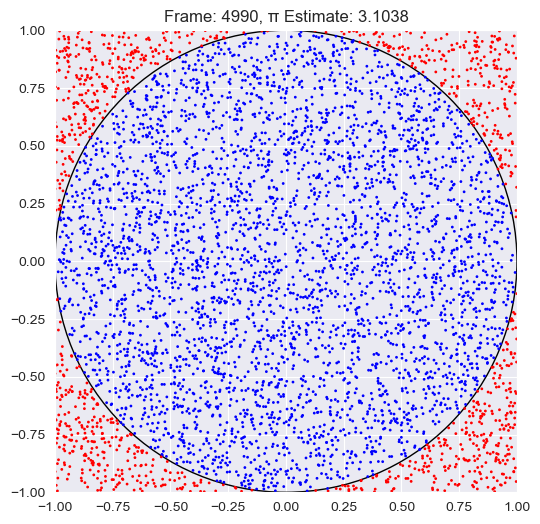

In [8]:
from matplotlib.animation import FuncAnimation

# Initialize parameters
total_points = 5000  # Total number of points for the animation
x_points = []        # List to store x-coordinates of points
y_points = []        # List to store y-coordinates of points
inside_circle = []   # List to track if each point is inside the unit circle

# Function to generate points and classify them as inside or outside the circle
def generate_points(num_points):
    """Generates random points in a square and classifies them as inside or outside the unit circle."""
    for _ in range(num_points):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)  # Generate random (x, y) point
        x_points.append(x)
        y_points.append(y)
        # Check if the point lies within the unit circle (radius = 1)
        inside_circle.append(x**2 + y**2 <= 1)

# Generate all points for the animation
generate_points(total_points)

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)  # Set x-axis limits to the bounds of the square
ax.set_ylim(-1, 1)  # Set y-axis limits to the bounds of the square
ax.set_aspect('equal')  # Equal aspect ratio to keep the circle shape intact
circle = plt.Circle((0, 0), 1, color='black', fill=False)  # Draw the unit circle
ax.add_artist(circle)  # Add circle to the plot as a reference

# Initialize an empty scatter plot that will be updated with new points in each frame
scat = ax.scatter([], [], s=1)

# Animation update function
def update(frame):
    """Updates the scatter plot for the given frame."""
    # Select points up to the current frame
    x_data = x_points[:frame]
    y_data = y_points[:frame]
    # Assign colors based on whether points are inside (blue) or outside (red) the circle
    colors = ['blue' if inside else 'red' for inside in inside_circle[:frame]]
    # Update scatter plot with the new points and colors
    scat.set_offsets(np.column_stack([x_data, y_data]))  # Update point positions
    scat.set_color(colors)  # Update point colors based on inside/outside status

    # Calculate and update π estimate based on points within the circle
    inside_count = sum(inside_circle[:frame])  # Count points inside the circle up to the current frame
    pi_estimate = (inside_count / frame) * 4  # Estimate π using the ratio of inside points
    ax.set_title(f"Frame: {frame}, π Estimate: {pi_estimate:.4f}")  # Display frame and π estimate in title

# Create the animation
ani = FuncAnimation(fig, update, frames=range(10, total_points, 10), repeat=False)

# Save the animation as a GIF
ani.save("monte_carlo_pi_estimation.gif", writer="pillow", fps=20)

# Display the animation
plt.show()
